**Dataset**
Dataset has 11 features.

1. **Airline**: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2. **Flight**: Flight stores information regarding the plane's flight code. It is a categorical feature.
3. **Source City**: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4. **Departure Time**: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5. **Stops**: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6. **Arrival Time**: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7. **Destination City**: City where the flight will land. It is a categorical feature having 6 unique cities.
8. **Class**: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9. **Duration**: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10. **Days Left**: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11. **Price**: Target variable stores information of the ticket price.

In [121]:
# import libraries needed for exploratory data analysis (eda) and feature engineering (fe)
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [122]:
pd.set_option('display.max_columns',None) #display all possible columns
for dirname, _, filenames in os.walk('../data'): 
    for filename in filenames:
        print(os.path.join(dirname, filename)) #list all files in the data directory

../data\business.csv
../data\clean_dataset.csv
../data\economy.csv


In [123]:
df=pd.read_csv('../data/clean_dataset.csv') #load data into dataframe
df.head(5) #display head (top 5 rows)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [124]:
df.tail(5) #display tail (last 5 rows)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [125]:
print(f"Shape: ",df.shape) #get total shape of dataset, total rows and columns
print("Number of Columns:", df.shape[1])
print("Number of Rows:", df.shape[0])

Shape:  (300153, 12)
Number of Columns: 12
Number of Rows: 300153


In [126]:
df.info() #quick info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [127]:
df.describe().transpose() #statistics for numerical datatypes

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [128]:
df.drop('Unnamed: 0',axis=1, inplace = True) #drop unwanted column permanently

In [129]:
df.isna().sum() #number of missing values per column

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [130]:
df.dropna() #drop rows with any NA values

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [131]:
print("Number of Duplicates: ", df.duplicated().sum())

Number of Duplicates:  0


In [132]:
df.drop_duplicates() #drop rows with duplicate vales

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [133]:
df.nunique() #number of unique values in each column

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [134]:
df.columns #show all cloumns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [135]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Numerical Features : {} : {}'.format(len(numerical_features), numerical_features))
print('Categorical Features : {} : {}'.format(len(categorical_features), categorical_features))


Numerical Features : 3 : ['duration', 'days_left', 'price']
Categorical Features : 8 : ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [136]:
#get unique values in categorical columns
for column in categorical_features:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'airline': ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in column 'flight': ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
Unique values in column 'source_city': ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique values in column 'departure_time': ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique values in column 'stops': ['zero' 'one' 'two_or_more']
Unique values in column 'arrival_time': ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique values in column 'destination_city': ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique values in column 'class': ['Economy' 'Business']


In [137]:
df.info() #quick info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [138]:
df.describe() #statistics for numerical datatypes

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [139]:
#number of flights by airline
df1=df.groupby(['flight','airline'],as_index=False).count()
df1['airline'].value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

In [140]:
#economy vs business class
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

In [141]:
#number of flights by source and destination
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().sort_values(by=['flight'], ascending=False)

,source_city,destination_city,flight
14,Delhi,Mumbai,364
10,Delhi,Bangalore,310
13,Delhi,Kolkata,306
27,Mumbai,Delhi,282
11,Delhi,Chennai,258
29,Mumbai,Kolkata,240
25,Mumbai,Bangalore,228
1,Bangalore,Delhi,227
12,Delhi,Hyderabad,224
22,Kolkata,Delhi,185


In [142]:
#average price by source and destination
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().sort_values(by=['price'], ascending=False)

,airline,source_city,destination_city,price
150,Vistara,Bangalore,Kolkata,35746.714874
160,Vistara,Delhi,Kolkata,35702.441732
176,Vistara,Mumbai,Kolkata,35223.862417
172,Vistara,Mumbai,Bangalore,35029.880315
151,Vistara,Bangalore,Mumbai,34961.383271
...,...,...,...,...
0,AirAsia,Bangalore,Chennai,2073.043478
7,AirAsia,Chennai,Hyderabad,2053.182540
76,GO_FIRST,Hyderabad,Chennai,1942.263158
5,AirAsia,Chennai,Bangalore,1914.760870


In [143]:
economy_price_mean = round(df[df["class"] == "Economy"]["price"].mean(),0)
economy_price_median = round(df[df["class"] == "Economy"]["price"].median(),0)
business_price_mean = round(df[df["class"] == "Business"]["price"].mean(),0)
business_price_median = round(df[df["class"] == "Business"]["price"].median(),0)

print("Economy Class (Mean): ", economy_price_mean)
print("Economy Class (Median): ", economy_price_median)
print("Business Class (Mean): ", business_price_mean)
print("Business Class (Median): ", business_price_median)

Economy Class (Mean):  6572.0
Economy Class (Median):  5772.0
Business Class (Mean):  52540.0
Business Class (Median):  53164.0


**Data Visualisation**

1. Price range by airlines
2. Price range by no. of stops
3. Price range by class
4. Price range by departure and arrival time slots
5. Price range by flight duration
6. Price range by days left to departure

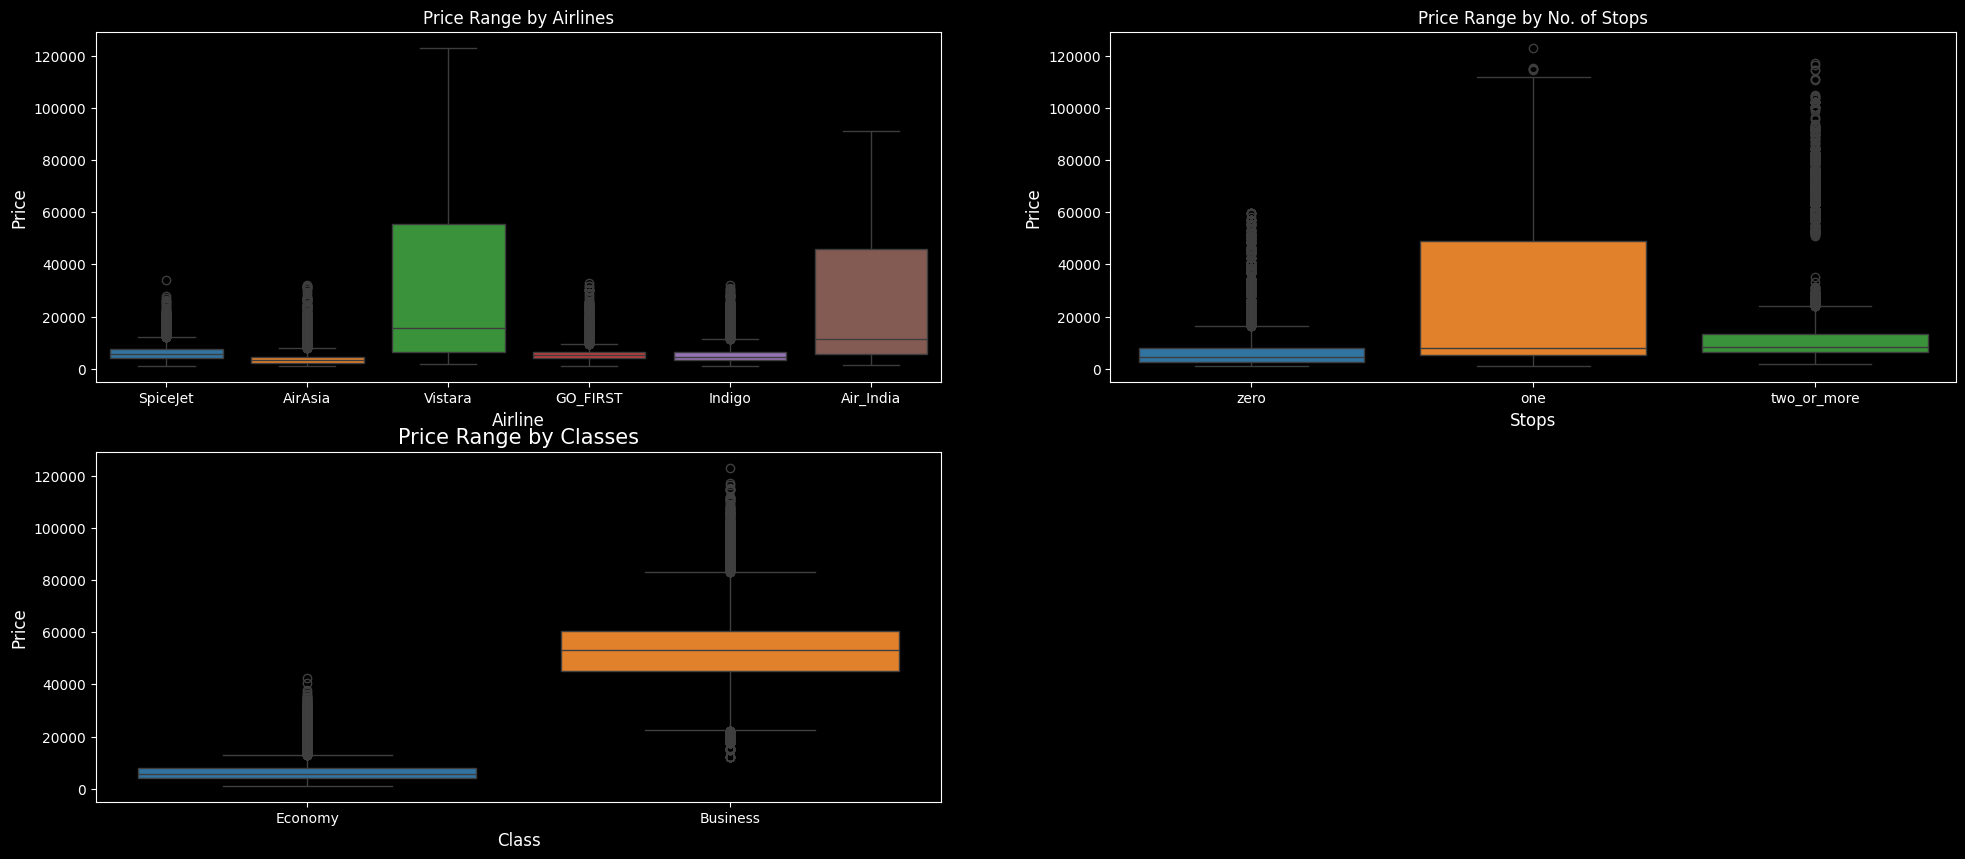

In [144]:
plt.figure(figsize=(24,10))
plt.subplot(2,2,1)
sns.boxplot(x=df['airline'],y=df['price'],palette='tab10')
plt.title('Price Range by Airlines',fontsize=12)
plt.xlabel('Airline',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(2,2,2)
sns.boxplot(x='stops',y='price',data=df,palette='tab10')
plt.title('Price Range by No. of Stops',fontsize=12)
plt.xlabel('Stops',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(2,2,3)
sns.boxplot(x='class',y='price',data=df,palette='tab10')
plt.title('Price Range by Classes',fontsize=15)
plt.xlabel('Class',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

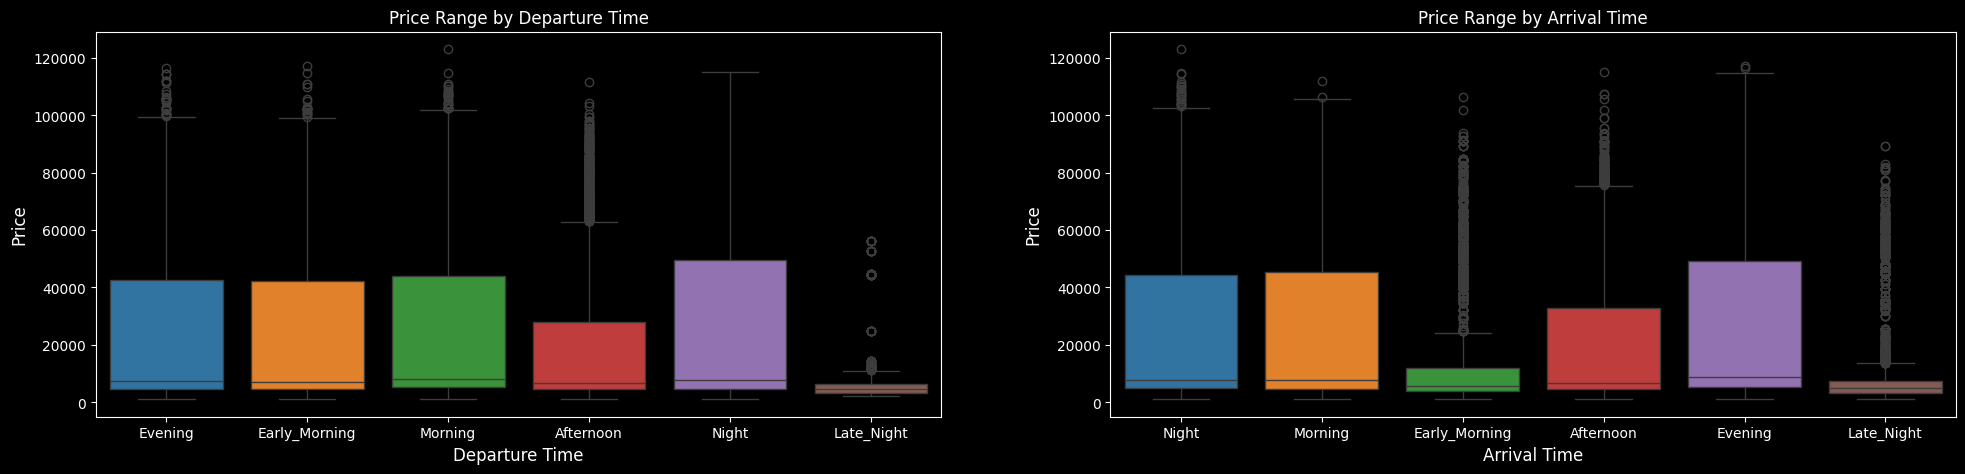

In [145]:
plt.figure(figsize=(24,5))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df,palette='tab10')
plt.title('Price Range by Departure Time',fontsize=12)
plt.xlabel('Departure Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='tab10')
plt.title('Price Range by Arrival Time',fontsize=12)
plt.xlabel('Arrival Time',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

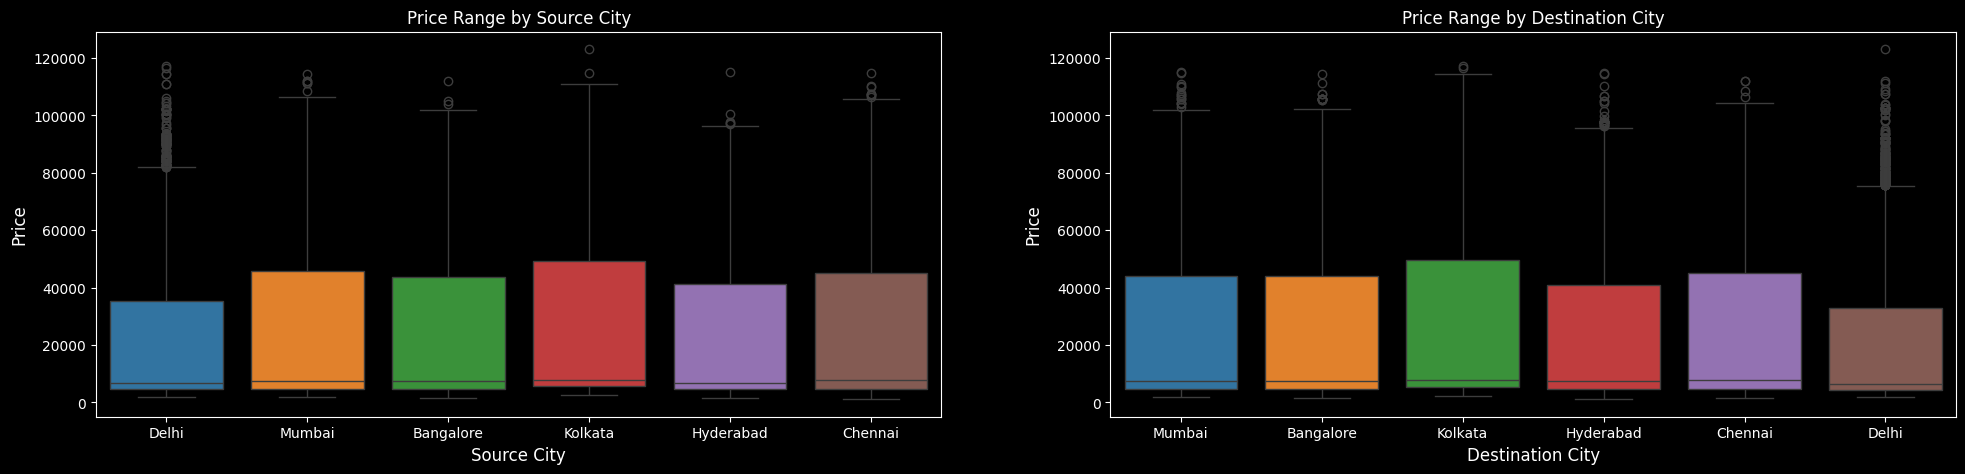

In [146]:
plt.figure(figsize=(24,5))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df,palette='tab10')
plt.title('Price Range by Source City',fontsize=12)
plt.xlabel('Source City',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='tab10')
plt.title('Price Range by Destination City',fontsize=12)
plt.xlabel('Destination City',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

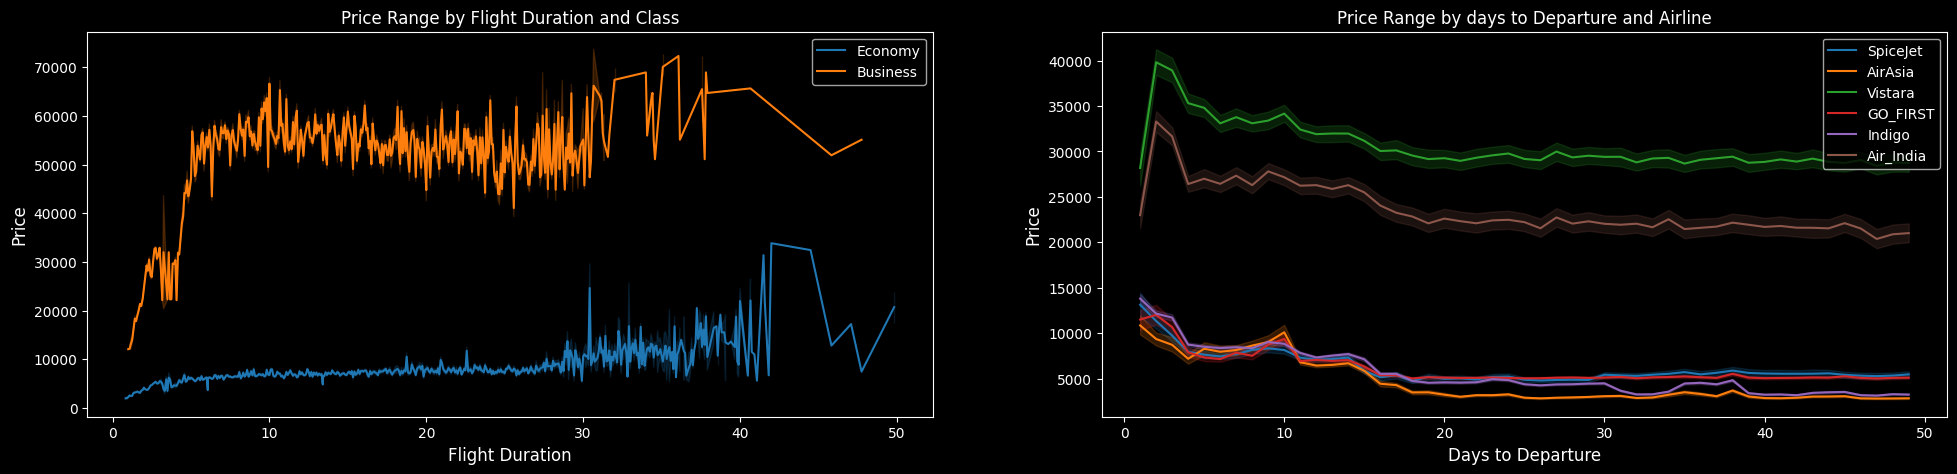

In [147]:
plt.figure(figsize=(24,5))
plt.subplot(1,2,1)
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='tab10')
plt.title('Price Range by Flight Duration and Class',fontsize=12)
plt.legend(fontsize=10)
plt.xlabel('Flight Duration',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.subplot(1,2,2)
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='tab10')
plt.title('Price Range by days to Departure and Airline',fontsize=12)
plt.legend(fontsize=10)
plt.xlabel('Days to Departure',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.show()

**Observations**

1. Indigo has the maximum number of flights
2. Vistara and Air India has more price range
3. Single stop flights are more expensive
4. Ticket price is lowest for arrival and depature time as Late Night
5. Ticket price is more when departure time is Night or arrival time is Evening
6. Ticket price is the most for flights to and from Kolkata
7. Ticket price is the least for flights to and from Delhi
8. Ticket price is directly proportional to duration of the flight
9.  Ticket price is inversely propotional to days to departure